In [1]:
from mlflow.tracking import MlflowClient
from mlflow.entities import ViewType
from mlflow import list_run_infos
from urllib.parse import urlparse, unquote_plus
import pandas as pd
import seaborn as sn

/Users/matiascovarrubias/Library/Caches/pypoetry/virtualenvs/marketsai-reVLCGV_-py3.8/lib/python3.8/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
# Get experiment
# NOTE: Make sure your CWD is set to the directory where your mlruns/ folder is located.

# import os
# print(os.getcwd()) # Shows the CWD
# os.chdir(NEW_PATH) # Sets the CWD to an arbitrary path.

client = MlflowClient()
experiment = client.get_experiment_by_name("DQN_base_April4")

In [3]:
exp_id = experiment.experiment_id
runs = list_run_infos(exp_id)
runs = sorted(runs, key=lambda r: r.end_time)
latest_run = runs[-1]
artifact_uri = unquote_plus(urlparse(str(latest_run.artifact_uri)).path)
progress_path = artifact_uri + "/progress.csv"
progress = pd.read_csv(progress_path)
progress

,episode_reward_max,episode_reward_min,episode_reward_mean,episode_len_mean,episodes_this_iter,num_healthy_workers,timesteps_total,done,episodes_total,training_iteration,...,info/learner/policy_0/min_q,info/learner/policy_0/max_q,info/learner/policy_0/mean_td_error,info/learner/policy_1/allreduce_latency,info/learner/policy_1/grad_gnorm,info/learner/policy_1/cur_lr,info/learner/policy_1/mean_q,info/learner/policy_1/min_q,info/learner/policy_1/max_q,info/learner/policy_1/mean_td_error
0,NaN,NaN,NaN,NaN,0,13,1040,False,0,1,...,-0.234243,0.084389,-0.199905,0.0,0.210251,0.15,0.012319,-0.137982,0.132418,-0.122548
1,36.526829,28.548917,33.115773,100.0,13,13,2080,False,13,2,...,15.449787,28.893896,-21.508863,0.0,0.453826,0.15,1.670715,0.759216,2.496127,-7.721572
2,36.526829,28.548917,32.801531,100.0,13,13,3120,False,26,3,...,18.718950,27.599363,-5.397383,0.0,0.110962,0.15,2.926320,2.582274,3.226036,0.532327
3,36.526829,28.548917,32.865046,100.0,13,13,4160,False,39,4,...,20.132645,24.337152,0.222548,0.0,0.047475,0.15,3.551008,3.356530,3.692641,0.213634
4,36.526829,28.548917,32.852247,100.0,13,13,5200,False,52,5,...,19.588703,23.561945,-1.365279,0.0,0.003896,0.15,3.866507,3.732217,3.952924,0.029715
5,36.526829,28.548917,32.852247,100.0,0,13,6240,False,52,6,...,18.042135,20.659859,-1.066454,0.0,0.005188,0.15,4.030371,3.836120,4.123965,0.041250
6,38.367858,28.548917,32.882546,100.0,13,13,7280,False,65,7,...,19.502508,20.976776,0.983598,0.0,0.002467,0.15,4.125680,4.000084,4.191054,0.022343
7,38.367858,28.548917,33.001072,100.0,13,13,8320,False,78,8,...,18.365273,20.467888,0.980180,0.0,0.008576,0.15,4.221485,4.073503,4.304788,0.074747
8,38.367858,28.548917,33.059379,100.0,13,13,9360,True,91,9,...,15.244991,17.059416,-0.050224,0.0,0.004865,0.15,4.299689,4.140205,4.415218,0.037673


<AxesSubplot:xlabel='episodes_total', ylabel='episode_reward_mean'>

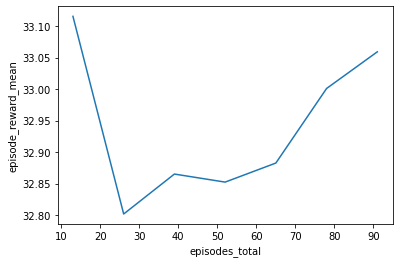

In [4]:
sn.lineplot(data=progress, x="episodes_total",y="episode_reward_mean")